# PPM reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A simple 1D finite-volume grid class.  This includes some methods that allow us to plot the grid.

In [2]:
from grid import FVGrid

In [3]:
%pycat grid.py

import numpy as np
import matplotlib.pyplot as plt


class FVGrid:
    """The main finite-volume grid class for holding our fluid state."""

    def __init__(self, nx, ng, xmin=0.0, xmax=1.0):

        self.xmin = xmin
        self.xmax = xmax
        self.ng = ng
        self.nx = nx

        self.lo = ng
        self.hi = ng+nx-1

        # physical coords -- cell-centered
        self.dx = (xmax - xmin)/(nx)
        self.xl = xmin + (np.arange(nx+2*ng)-ng)*self.dx
        self.xr = xmin + (np.arange(nx+2*ng)-ng+1.0)*self.dx
        self.x = xmin + (np.arange(nx+2*ng)-ng+0.5)*self.dx

    def scratch_array(self, nc=1):
        """ return a scratch array dimensioned for our grid """
        return np.squeeze(np.zeros((self.nx+2*self.ng, nc), dtype=np.float64))

    def fill_BCs(self, atmp):
        """ fill all ghost cells with zero-gradient boundary conditions """
        if atmp.ndim == 2:
            for n in range(atmp.shape[-1]):
                atmp[0:self.lo, n] = atmp[self.lo,

A class to manage PPM reconstruction.  This will also allow us to visualize the parabola
on the plot created by the FVGrid class.

In [4]:
from reconstruction import PPMInterpolant

In [5]:
%pycat reconstruction.py

import numpy as np


class PPMInterpolant:
    """Given a fluid variable a defined on the FVGrid grid, perform
    the PPM reconstruction"""
    def __init__(self, grid, a, *, limit=True):
        self.grid = grid
        assert grid.ng >= 3

        self.a = a
        self.limit = limit

        self.aint = grid.scratch_array()

        self.ap = grid.scratch_array()
        self.am = grid.scratch_array()
        self.a6 = grid.scratch_array()

    def construct_parabola(self):
        # first do the cubic interpolation in zones in all but the last ghost cell
        # we will be getting a_{i+1/2}

        # the state will initially be defined on ib:ie+1
        ib = self.grid.lo-2
        ie = self.grid.hi+1

        da0 = self.grid.scratch_array()
        dap = self.grid.scratch_array()

        # 1/2 (a_{i+1} - a_{i-1})
        da0[ib:ie+1] = 0.5 * (self.a[ib+1:ie+2] - self.a[ib-1:ie])

        # 1/2 (a_{i+2} - a_{i})
        dap[ib:ie+1] = 0.5 * (self.a[ib+2:ie+3] - self.a[ib:ie+1

An example grid with 4 cells + 3 ghost cells

In [6]:
g = FVGrid(4, 3)

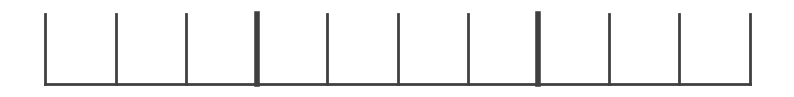

In [7]:
fig, ax = g.draw()

Let's create data on the grid (including the ghost cells) and visualize the PPM reconstruction.

In [8]:
a = g.scratch_array()
a[:] = [0.3, 1.0, 0.9, 0.8, 0.25, 0.1, 0.5, 0.55, 0.25, 0.1]
#g.fill_BCs(a)
a

array([0.3 , 1.  , 0.9 , 0.8 , 0.25, 0.1 , 0.5 , 0.55, 0.25, 0.1 ])

In [9]:
ppm = PPMInterpolant(g, a)

In [10]:
ppm.construct_parabola()

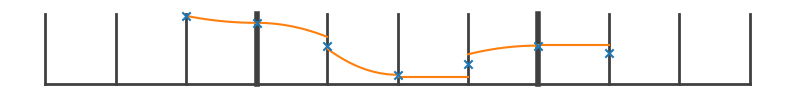

In [11]:
ppm.draw_parabola(ax)
ppm.mark_cubic(ax)
fig